## [Interpolation](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.00-Interpolation.html)

## Linear Interpolation

In linear interpolation, the estimated point is assumed to lie on the line joining the nearest points to the left and right. Assume, without loss of generality, that the 𝑥-data points are in ascending order; that is, $𝑥_𝑖<𝑥_{𝑖+1}$, and let 𝑥 be a point such that $𝑥_𝑖<𝑥<𝑥_{𝑖+1}$. Then the linear interpolation at 𝑥 is: $𝑦̂(𝑥)=𝑦_𝑖+\frac{(𝑦_𝑖+1−𝑦_𝑖)(𝑥−𝑥_𝑖)}{(𝑥_{𝑖+1}−𝑥_𝑖)}.$

TRY IT! Find the linear interpolation at 𝑥=1.5 based on the data x = [0, 1, 2], y = [1, 3, 2]. Verify the result using scipy’s function interp1d.

Since 1<𝑥<2, we use the second and third data points to compute the linear interpolation. Plugging in the corresponding values gives $𝑦̂ (𝑥)=𝑦_𝑖+\frac{(𝑦_{𝑖+1}−𝑦_𝑖)(𝑥−𝑥_𝑖)}{(𝑥_{𝑖+1}−𝑥_𝑖)}=3+\frac{(2−3)(1.5−1)}{(2−1)}=2.5$

In [4]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

/var/folders/1d/b_59w_9j0kx4nzfn4hkp84lc0000gn/T/ipykernel_48120/2231738046.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [14]:
x = [0, 1, 2]
y = [1, 3, 2]
f = interp1d(x, y)
y_hat = f(1.5)
print(y_hat)

2.5


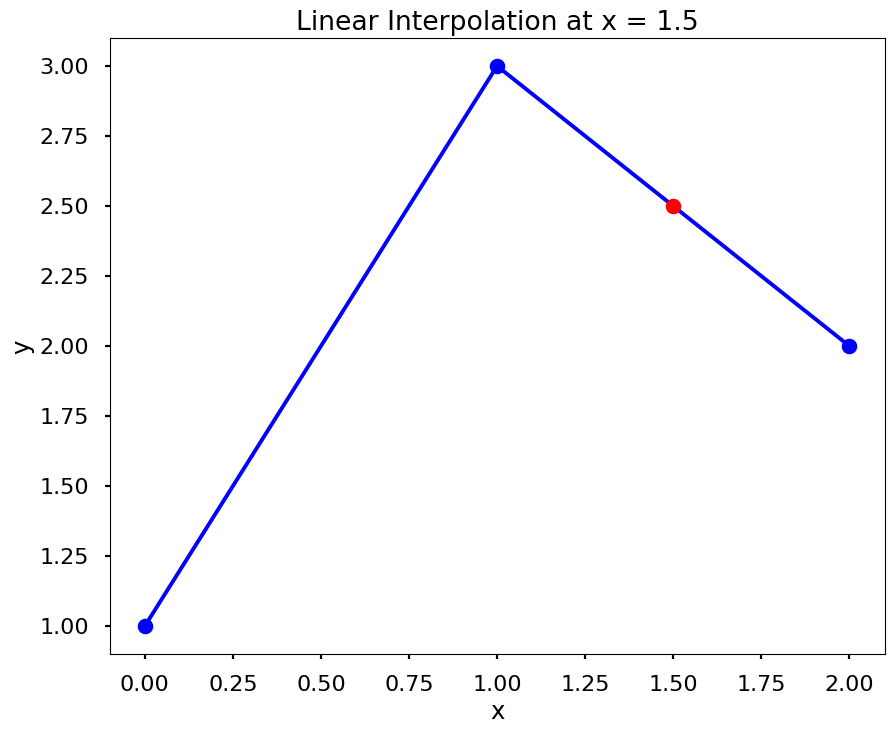

In [15]:
plt.figure(figsize = (10,8))
plt.plot(x, y, '-ob')
plt.plot(1.5, y_hat, 'ro')
plt.title('Linear Interpolation at x = 1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Cubic Spline Interpolation

In cubic spline interpolation, the interpolating function is a set of piecewise cubic functions. Specifically, we assume that the points $(𝑥_𝑖,𝑦_𝑖)$ and $(𝑥_{𝑖+1},𝑦_{𝑖+1})$ are joined by a cubic polynomial $𝑆_𝑖(𝑥)=𝑎_𝑖𝑥^3+𝑏_𝑖𝑥^2+𝑐_𝑖𝑥+𝑑_𝑖$ that is valid for $𝑥_𝑖≤𝑥≤𝑥_{𝑖+1}$ for 𝑖=1,…,𝑛−1. To find the interpolating function, we must first determine the coefficients $𝑎_𝑖,𝑏_𝑖,𝑐_𝑖,𝑑_𝑖$ for each of the cubic functions. 

In [16]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

/var/folders/1d/b_59w_9j0kx4nzfn4hkp84lc0000gn/T/ipykernel_48120/3963957643.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [22]:
x = [0, 1, 2]
y = [1, 3, 2]

# use bc_type = 'natural' adds constraints on the derivative
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 2, 100)
y_new = f(x_new)

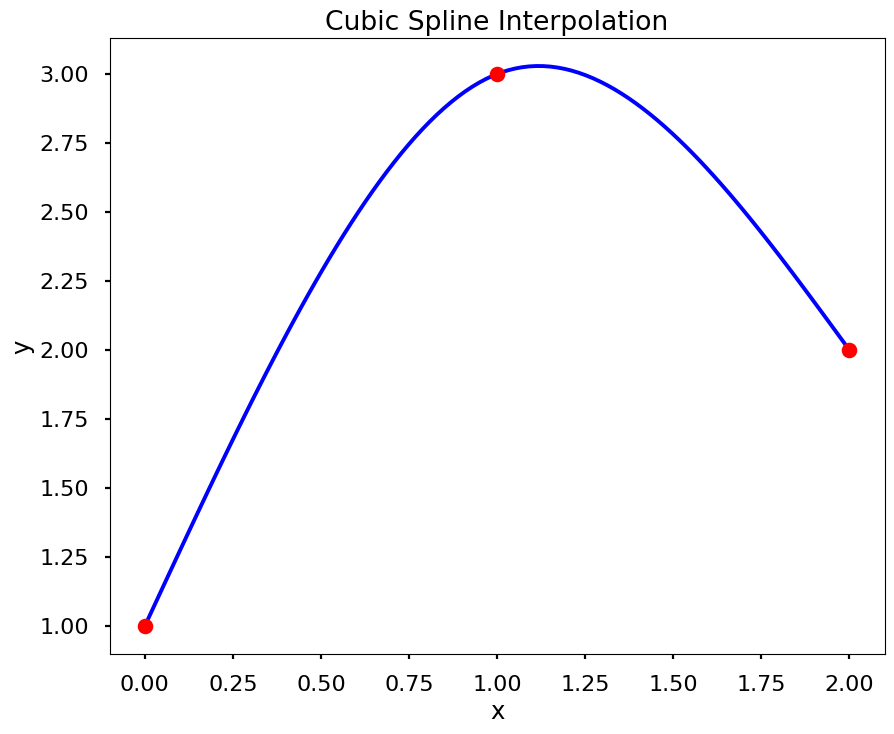

In [19]:
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Lagrange Polynomial Interpolation

Rather than finding cubic polynomials between subsequent pairs of data points, Lagrange polynomial interpolation finds a single polynomial that goes through all the data points. This polynomial is referred to as a Lagrange polynomial, $𝐿(𝑥)$, and as an interpolation function, it should have the property $𝐿(𝑥_𝑖)=𝑦_𝑖$ for every point in the data set. For computing Lagrange polynomials, it is useful to write them as a linear combination of Lagrange basis polynomials.

In [23]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

/var/folders/1d/b_59w_9j0kx4nzfn4hkp84lc0000gn/T/ipykernel_48120/3535781376.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


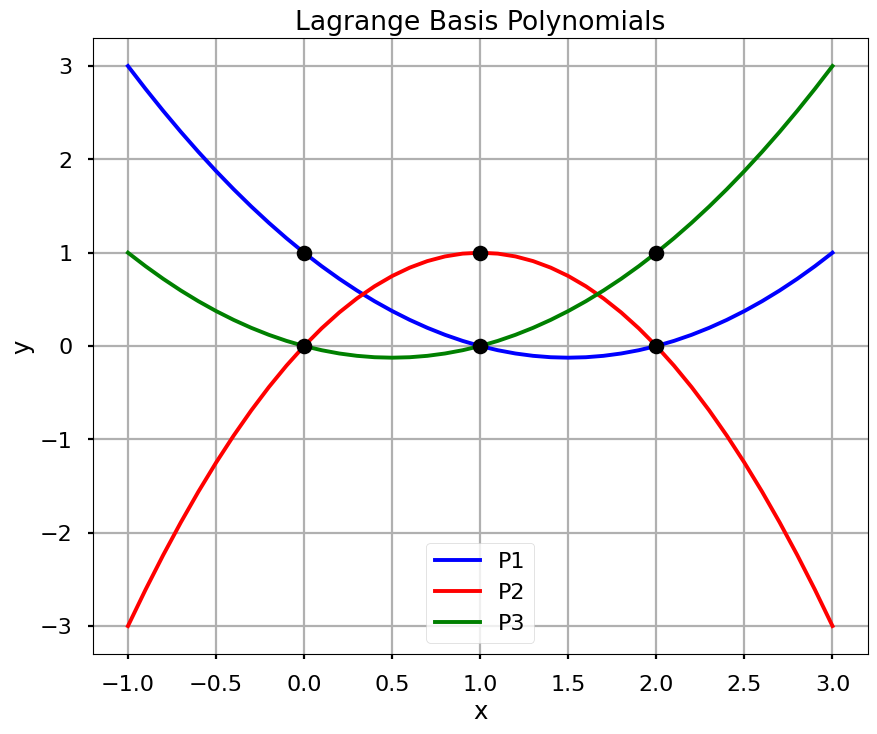

In [24]:
x = [0, 1, 2]
y = [1, 3, 2]
P1_coeff = [1,-1.5,.5]
P2_coeff = [0, 2,-1]
P3_coeff = [0,-.5,.5]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

In [25]:
from scipy.interpolate import lagrange
f = lagrange(x, y)

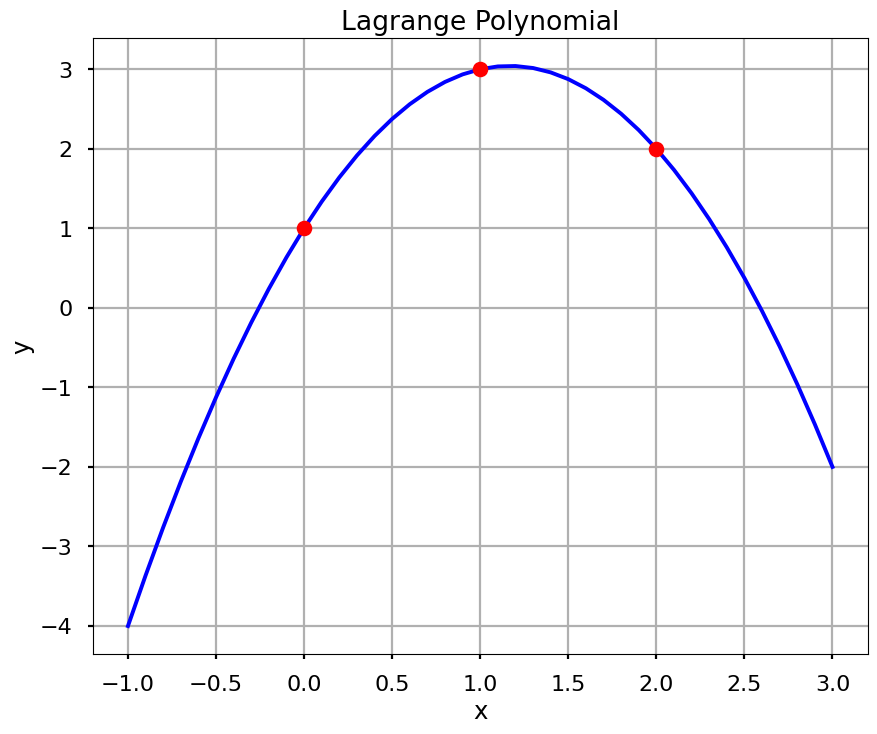

In [26]:
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Newton’s Polynomial Interpolation

Newton’s polynomial interpolation is another popular way to fit exactly for a set of data points. The general form of the an 𝑛−1 order Newton’s polynomial that goes through 𝑛 points is:

$𝑓(𝑥)=𝑎_0+𝑎_1(𝑥−𝑥_0)+𝑎_2(𝑥−𝑥_0)(𝑥−𝑥_1)+⋯+𝑎_𝑛(𝑥−𝑥_0)(𝑥−𝑥_1)…(𝑥−𝑥_𝑛)$

In [27]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

/var/folders/1d/b_59w_9j0kx4nzfn4hkp84lc0000gn/T/ipykernel_48120/2714354034.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [28]:
def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial 
    at x
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

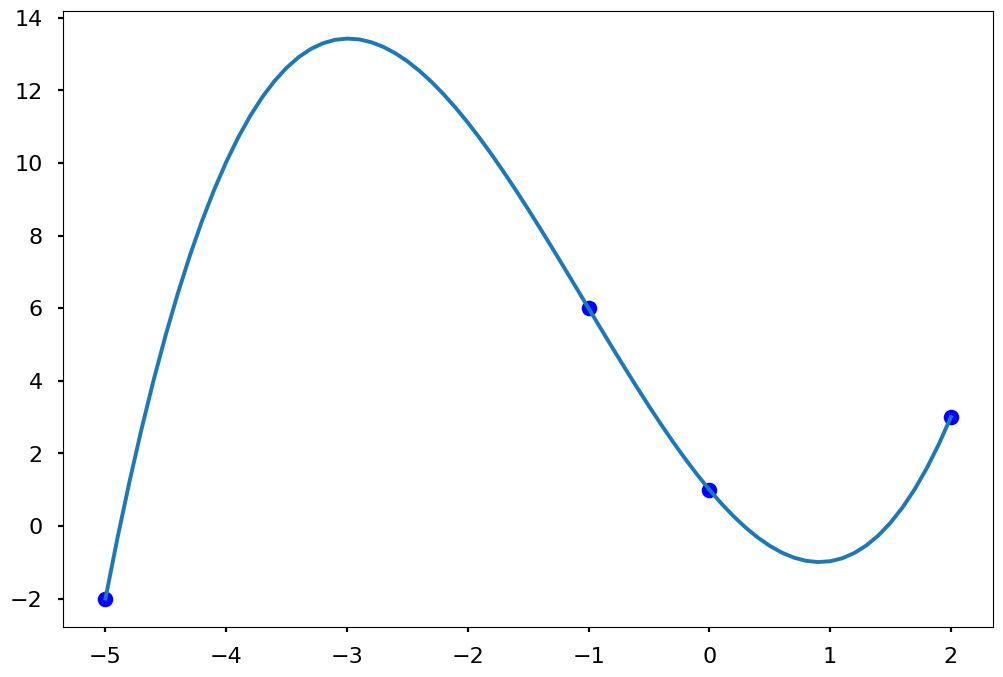

In [29]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)